In [2]:
% matplotlib inline

import pandas as pd, numpy as np
import seaborn as sns
import utils.stats as stats
import utils.viz as viz
import statsmodels.formula.api as smf
import utils.viz as viz
from scipy.stats import shapiro
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('poster')

data_dir = '/Users/sabine/workspace/distconnect_macaque/data'

df_r = pd.read_pickle('%s/df_regionwise.pkl' % data_dir)
df_p = pd.read_pickle('%s/df_pairwise.pkl' % data_dir)

In [3]:
df_r = df_r.rename(columns={'injection distance from nearest primary region': "dist_inj_prim",
                            'incoming': "connectivity_distance"})

In [8]:
excl_areas = ['9', '10', '11', '12', '9_46d', '9_46v', '46d', '46v', 'TEpd'] 
fltr = df_r.area.isin(excl_areas)

In [9]:
fltr = (df_r.area.isin(excl_areas) | df_r.connectivity_distance.isnull())

In [10]:
null = smf.ols(formula='connectivity_distance ~ location + region_size', data=df_r[~fltr]).fit()

In [11]:
model = smf.ols(formula='connectivity_distance ~ location \
                                                 + region_size \
                                                 + dist_inj_prim', data=df_r[~fltr]).fit()
print model.summary()

                              OLS Regression Results                             
Dep. Variable:     connectivity_distance   R-squared:                       0.716
Model:                               OLS   Adj. R-squared:                  0.674
Method:                    Least Squares   F-statistic:                     16.83
Date:                   Sun, 13 May 2018   Prob (F-statistic):           1.08e-05
Time:                           13:46:27   Log-Likelihood:                -55.341
No. Observations:                     24   AIC:                             118.7
Df Residuals:                         20   BIC:                             123.4
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

In [12]:
df_r['corrected_condist'] = None
df_r['corrected_condist'][~fltr] = null.resid + df_r.connectivity_distance[~fltr].mean()

/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
df_r["corrected_condist"] = df_r.corrected_condist.astype('float16')

In [52]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), size='xx-small')

In [53]:
sns.set_style('white')

In [95]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.4, point['y']-.3, str(point['val']), size='xx-small')

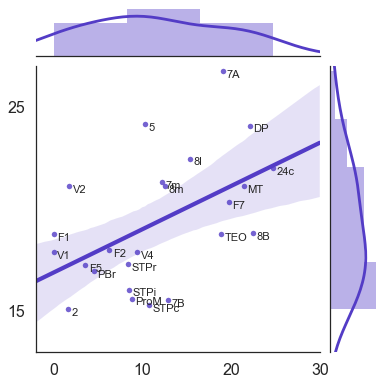

In [97]:
g = sns.jointplot(x="dist_inj_prim", y="corrected_condist", 
                  data=df_r[~fltr], kind='reg', 
                  color="#533cc6", 
                  xlim=(-2,30), ylim=(13,27),
                  stat_func=None,
                  scatter_kws={"s": 30})


plt.xticks([0,10,20,30])
plt.yticks([15,25])
plt.xlabel('')
plt.ylabel('')


label_point(df_r.dist_inj_prim[~fltr], 
            df_r.corrected_condist[~fltr], 
            df_r.area[~fltr], 
            plt.gca()) 


g.savefig('/Users/sabine/Downloads/relationship_struct.png', dpi=300)